In [83]:
import numpy as np #scientific computing
import pandas as pd #data management
import itertools

#matplotlib for plotting
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.ticker as mtick #for percentage ticks

#Imbalancing
from imblearn.over_sampling import SMOTE

#Imputer
from sklearn.impute import SimpleImputer

#sklearn for modeling
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #Decision Tree algorithm
from sklearn.model_selection import train_test_split #Data split function
from sklearn.preprocessing import LabelEncoder #OneHotEncoding
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import f1_score



#Decision tree plot
import pydotplus
import seaborn as sns
from IPython.display import Image

#Models
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# Loading the datasets

In [84]:
data = pd.read_csv("./reddit_sentiments_classification_with_karma.csv")

In [85]:
data.head()

stamp coin  avg_post_karma  avg_post_vote  \
0  2021-04-01 00:00:00.000000  BTC     3786.370370            1.0   
1  2021-04-01 01:00:00.000000  BTC     2666.000000            1.0   
2  2021-04-01 02:00:00.000000  BTC     3792.133333            1.0   
3  2021-04-01 03:00:00.000000  BTC     5401.000000            1.0   
4  2021-04-01 04:00:00.000000  BTC      947.000000            1.0   

   positive_posts  negative_posts  avg_comment_karma  avg_comment_vote  \
0               5               2       15510.571429              1.00   
1               5               1        6867.719512              1.34   
2               6               2       20680.673913              1.50   
3               2               0       15225.045455              1.34   
4               2               1       15536.719101              1.27   

   positive_comments  negative_comments  class  
0                 15                 17      0  
1                 26                  8      1  
2                 22                 11      0  
3                 31                  8      0  
4                 30                 10      1

In [86]:
# drop first column because its sudo primary key
data = data.iloc[:,2:]
data = data.drop(['negative_posts','negative_comments'], axis = 1)
data.head(10).style

In [47]:
data.describe().T

count          mean          std        min          25%  \
avg_post_karma     1615.0   4292.003457  4788.916631  22.636364  1219.491935   
avg_post_vote      1615.0      1.029883     0.220519   0.750000     1.000000   
avg_comment_karma  1615.0  13671.814339  5543.673675   0.000000  9892.618771   
avg_comment_vote   1615.0      2.607153     2.050711   0.000000     1.570000   
class              1615.0      0.497833     0.500150   0.000000     0.000000   

                            50%           75%           max  
avg_post_karma      2825.933333   5646.191228  50630.000000  
avg_post_vote          1.000000      1.000000      7.470588  
avg_comment_karma  12825.011236  16473.865865  45900.773810  
avg_comment_vote       2.230000      3.020000     37.530000  
class                  0.000000      1.000000      1.000000

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_post_karma     1615 non-null   float64
 1   avg_post_vote      1615 non-null   float64
 2   avg_comment_karma  1615 non-null   float64
 3   avg_comment_vote   1615 non-null   float64
 4   class              1615 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 63.2 KB


# Data Visualization

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


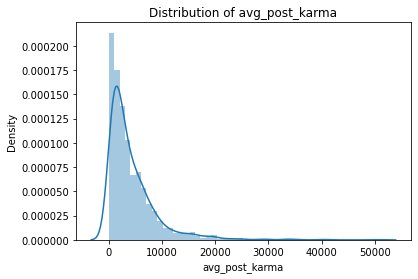

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


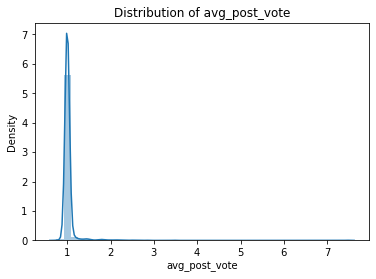

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


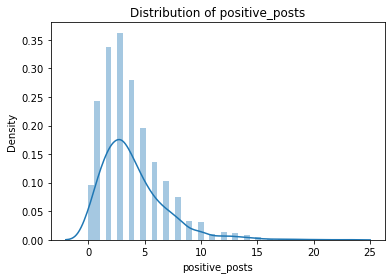

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


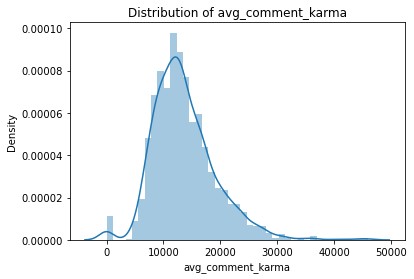

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


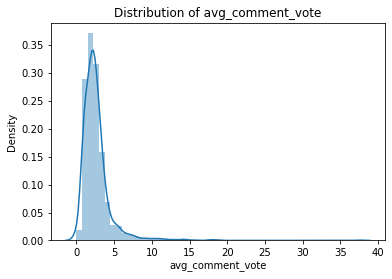

In [87]:
numeric_cols_to_distribute = ['avg_post_karma','avg_post_vote','positive_posts','positive_comments','avg_comment_karma','avg_comment_vote']
for col in data[numeric_cols_to_distribute]:
    plt.title(f'Distribution of {col}')
    sns.distplot(data[col])
    plt.show()

In [88]:
sns.pairplot(data)
plt.show()

In [51]:
plt.figure(figsize=(15, 15))
sns.heatmap(data.corr())
plt.show()

# Preprocessing Data

In [89]:
train, target = data.loc[:, data.columns != 'class'], data['class'] #define feature matrix X and labels y
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size = 0.3, random_state = 12345) #split data 70:30

In [90]:
X_train

avg_post_karma  avg_post_vote  positive_posts  avg_comment_karma  \
1140     1900.371429            1.0               9       15261.760417   
768      3285.578947            1.0               2        5512.549451   
1475    12960.000000            1.0               5       12114.554348   
750       896.352941            1.0               3        6848.280899   
303      1666.388889            1.0               1       14135.515789   
...              ...            ...             ...                ...   
1444     8305.074074            1.0               6       13238.480000   
129      1929.000000            1.0               2       15246.741935   
1309     4621.875000            1.0               0       11956.689655   
1509     5108.296296            1.0               4        7426.644444   
482      1699.266667            1.0               3        8144.467391   

      avg_comment_vote  positive_comments  
1140              2.11                 19  
768               1.54                 23  
1475              1.92                 34  
750               2.14                 14  
303               1.00                 21  
...                ...                ...  
1444              3.85                 19  
129               1.00                 23  
1309              1.79                 19  
1509              3.48                 27  
482               3.57                 24  

[1130 rows x 6 columns]

In [91]:
y_train

1140    1
768     1
1475    0
750     0
303     0
       ..
1444    0
129     1
1309    1
1509    0
482     1
Name: class, Length: 1130, dtype: int64

# Model Training and Accuracy

In [92]:
def feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    feature_order = np.array([train.columns.values])
    i = np.argsort(importances)[::-1]
    feature_order = feature_order[:,i]
    plt.figure()
    plt.title("Relative feature importances")
    plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
    plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
    plt.xlim([-1, train.shape[1]])
    plt.show()

In [93]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylim([1.5, -0.5]) #added to fix a bug that causes the matrix to be squished
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    
    

## Decision Tree

F1 score is:  0.6038338658146964
Accuracy is:  48.87


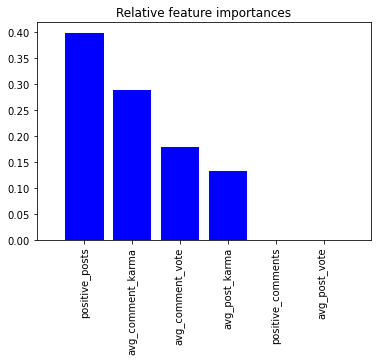

In [94]:
#Define Decision tree classifier with some default parameters
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3)

#Fit the training data 
clf.fit(X_train, y_train)

pred_DT = clf.predict(X_test)
pred_DT_probs = clf.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,pred_DT)))
# clf.score(X_test, y_test)
print ("Accuracy is: ", (accuracy_score(y_test,pred_DT)*100).round(2))

feature_importance(clf)

## Logistic Regression

In [95]:
lr_imb = LogisticRegression(solver='lbfgs',max_iter=100000).fit(X_train, y_train)
y_pred_lr_imb = lr_imb.predict(X_test)
y_predProba_lr_imb = lr_imb.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,y_pred_lr_imb)))
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_imb)*100).round(2))

importances = lr_imb.coef_[0]
indices = np.argsort(importances)[::-1]
feature_order = np.array([train.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, train.shape[1]])
plt.show()

F1 score is:  0.2112211221122112
Accuracy is:  50.72


## XGBClassifier

In [96]:
model = XGBClassifier().fit(X_train, y_train)

pred_XGB = model.predict(X_test)
pred_XGB_prob = model.predict_proba(X_test)
feature_importance(model)

print ("F1 score is: ", (f1_score(y_test,pred_XGB)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_XGB)*100).round(2))
# model.score(X_test, y_test)

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:38:39] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


F1 score is:  0.4713375796178344
Accuracy is:  48.66


## Naive bayes

In [97]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

pred_nb = model_nb.predict(X_test)
pred_NB_prob = model_nb.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,pred_nb)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_nb)*100).round(2))
# model_nb.score(X_test, y_test)

F1 score is:  0.6470588235294119
Accuracy is:  52.99


## SVC

In [98]:
# model_svc = SVC(kernel = "poly", probability=True)
# model_svc.fit(X_train, y_train)

# pred_svc = model_svc.predict(X_test)
# pred_svc_prob = model_svc.predict_proba(X_test)

# print ("F1 score is: ", (f1_score(y_test,pred_svc)))
# print ("Accuracy is: ", (accuracy_score(y_test,pred_svc)*100).round(2))
# # model_svc.score(X_test, y_test)

## Random Forest

In [99]:
model_rf = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1).fit(X_train, y_train)

pred_rf = model_rf.predict(X_test)
pred_RF_prob = model_rf.predict_proba(X_test)
feature_importance(model_rf)

print ("F1 score is: ", (f1_score(y_test,pred_rf)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_rf)*100).round(2))
# model_rf.score(X_test, y_test)

F1 score is:  0.47161572052401746
Accuracy is:  50.1


## Ensemble

In [100]:
model_voting = VotingClassifier(
    estimators=[
        ('rf', model_rf),
        ('gnb', model_nb),
        ('xgb', model),
    ],voting='soft')

pipe = make_pipeline(
    SimpleImputer(),
    model_voting
)


pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
y_pred_prob = pipe.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,y_pred)))
print ("Accuracy is: ", (accuracy_score(y_test,y_pred)*100).round(2))
# pipe.score(X_test, y_test)

[22:38:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score is:  0.5040983606557378
Accuracy is:  50.1


/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.war

In [101]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test, y_test, y_test, y_test], [y_predProba_lr_imb[:,1], pred_XGB_prob[:,1], pred_NB_prob[:,1], pred_RF_prob[:,1], y_pred_prob[:,1], pred_XGB_prob[:,1]], ['Logistic Regression','XGBClassifier', 'Naive Bayes', 'Random Forest','Model Ensemble', 'Decision Tree']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()

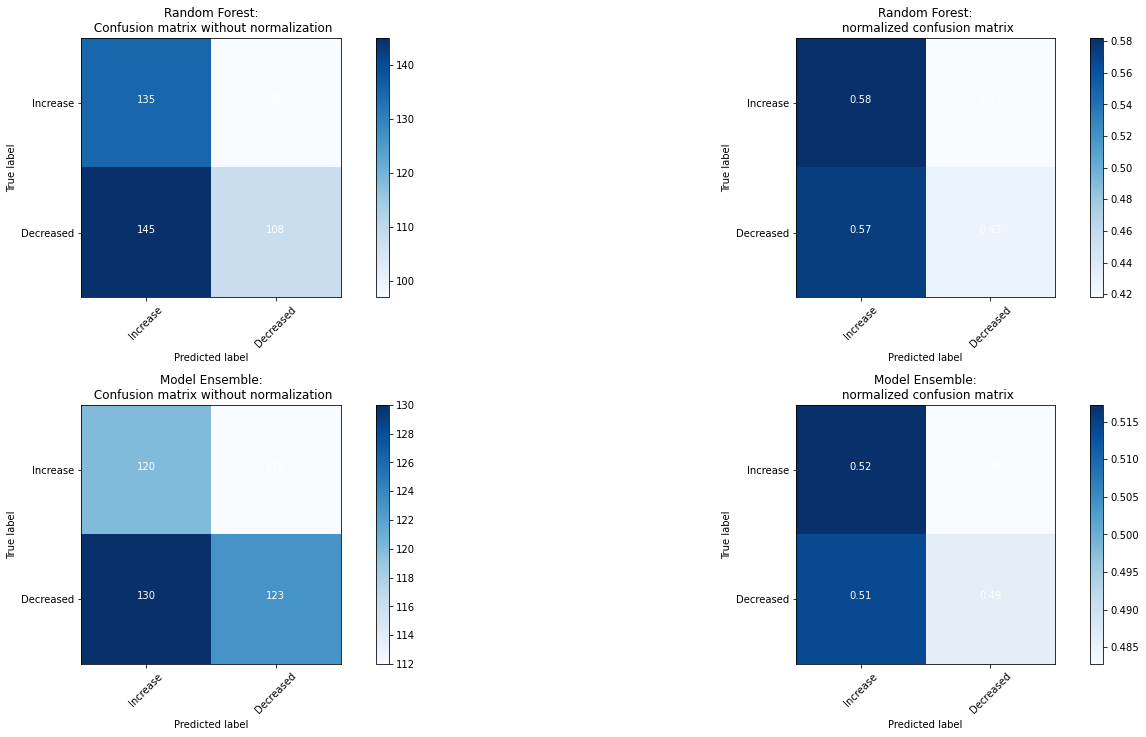

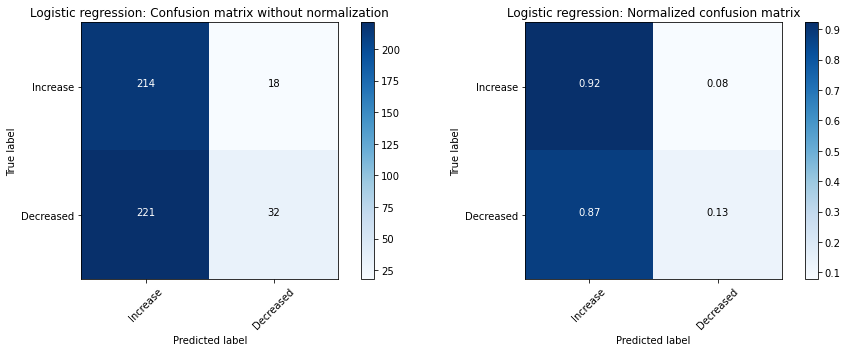

In [102]:
# Compute confusion matrix
class_names = ['Increase', 'Decreased']
cnf_matrix_clf = confusion_matrix(y_test, pred_DT)
cnf_matrix_XGB = confusion_matrix(y_test, pred_XGB) 
cnf_matrix_NB = confusion_matrix(y_test, pred_nb) 
# cnf_matrix_svm = confusion_matrix(y_test, pred_svc)
cnf_matrix_RF = confusion_matrix(y_test, pred_rf)
cnf_matrix_ensemble = confusion_matrix(y_test, y_pred)

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot Decision Tree confusion matrix
plt.subplot(321) 
plot_confusion_matrix(cnf_matrix_clf, classes=class_names,
                      title='Decision Tree:\n Confusion matrix without normalization')

#Plot Decision Tree normalized confusion matrix
plt.subplot(322) 
plot_confusion_matrix(cnf_matrix_clf, classes=class_names, normalize=True,
                      title='Decision Tree:\n normalized confusion matrix')


#Plot XGB confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_XGB, classes=class_names,
                      title='XGBoosting:\n Confusion matrix without normalization')

#Plot XGB normalized onfusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_XGB, classes=class_names, normalize=True,
                      title='XGBoosting:\n normalized confusion matrix')

#Plot Naive Bayes confusion matrix
plt.subplot(325) 
plot_confusion_matrix(cnf_matrix_NB, classes=class_names,
                      title='Naive Bayes:\n Confusion matrix without normalization')

#Plot Naive Bayes normalized onfusion matrix
plt.subplot(326) 
plot_confusion_matrix(cnf_matrix_NB, classes=class_names, normalize=True,
                      title='Naive Bayes:\n normalized confusion matrix')
plt.show()

np.set_printoptions(precision=2)

plt.figure(figsize=(20, 15))

#Plot SVM confusion matrix
# plt.subplot(321) 
# plot_confusion_matrix(cnf_matrix_svm, classes=class_names,
#                       title='SVM:\n Confusion matrix without normalization')

# #Plot SVM normalized confusion matrix
# plt.subplot(322) 
# plot_confusion_matrix(cnf_matrix_svm, classes=class_names, normalize=True,
#                       title='SVM:\n normalized confusion matrix')

#Plot RF confusion matrix
plt.subplot(323) 
plot_confusion_matrix(cnf_matrix_RF, classes=class_names,
                      title='Random Forest:\n Confusion matrix without normalization')

#Plot RF normalized confusion matrix
plt.subplot(324) 
plot_confusion_matrix(cnf_matrix_RF, classes=class_names, normalize=True,
                      title='Random Forest:\n normalized confusion matrix')

#Plot Model Ensemble confusion matrix
plt.subplot(325) 
plot_confusion_matrix(cnf_matrix_ensemble, classes=class_names,
                      title='Model Ensemble:\n Confusion matrix without normalization')

#Plot Model Ensemble normalized confusion matrix
plt.subplot(326) 
plot_confusion_matrix(cnf_matrix_ensemble, classes=class_names, normalize=True,
                      title='Model Ensemble:\n normalized confusion matrix')


plt.show()

cnf_matrix = confusion_matrix(y_test, y_pred_lr_imb)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13, 5))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Logistic regression: Confusion matrix without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Logistic regression: Normalized confusion matrix')


plt.show()

# Rebalancing Data and testing models

In [103]:
# X_train, X_test, y_train, y_test
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE
# smote = SMOTE(sampling_strategy='minority',random_state=12345)
smote = SMOTE(sampling_strategy='minority',random_state=12345)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

In [104]:
def plot_2d_space(X, y, label='Classes', title='x', xlabel='x', ylabel='y'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m, s=2
        )
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc='upper right')

Original label Counter({0: 579, 1: 551})
SMOTE label Counter({1: 579, 0: 579})


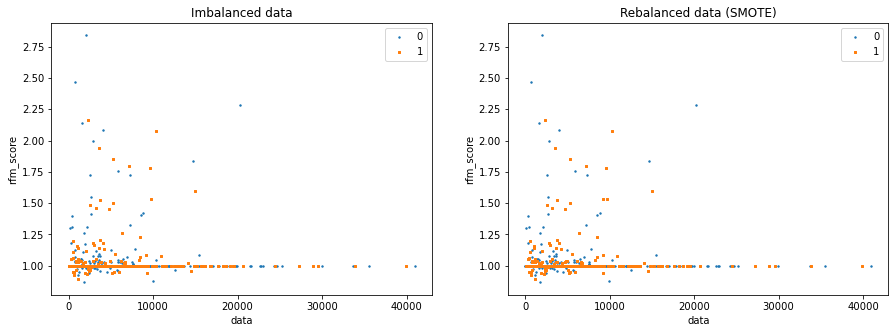

In [105]:
from collections import Counter

print('Original label %s' % Counter(y_train))
print('SMOTE label %s' % Counter(y_sm))

fig = plt.figure(figsize=(15, 5)) #specify figure size

ax0 = plt.subplot(121)
ax0 = plot_2d_space(np.array(X_train), y_train, title='Imbalanced data', xlabel='data', ylabel='rfm_score')

ax1 = plt.subplot(122)
ax1 = plot_2d_space(np.array(X_sm), y_sm, title='Rebalanced data (SMOTE)', xlabel='data', ylabel='rfm_score')

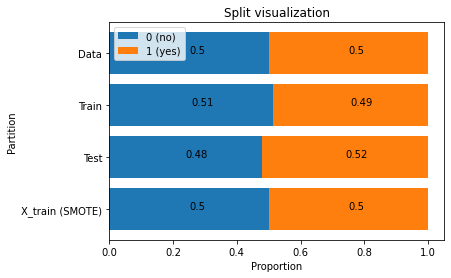

In [106]:
train_dist = y_train.value_counts() / len(y_train) #normalize absolute count values for plotting
test_dist = y_test.value_counts() / len(y_test)
data_dist = target.value_counts() / len(target)
smote_dist = pd.Series(y_sm).value_counts() / len(pd.Series(y_sm))

fig, ax = plt.subplots()

ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#1f77b4', label='0 (no)')
ax.barh(['X_train (SMOTE)','Test','Train','Data'], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]], left=[smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], color='#ff7f0e', label='1 (yes)')
ax.set_title('Split visualization')
ax.legend(loc='upper left')
plt.xlabel('Proportion')
plt.ylabel('Partition')

#plot bar values
for part, a, b in zip(['X_train (SMOTE)', 'Test', 'Train','Data'], [smote_dist[0], test_dist[0], train_dist[0], data_dist[0]], [smote_dist[1], test_dist[1], train_dist[1], data_dist[1]]):
    plt.text(a/2, part, str(np.round(a, 2)))
    plt.text(b/2+a, part, str(np.round(b, 2)));

# Decision Tree Balanced

F1 score is:  0.6038338658146964
Accuracy is:  48.87


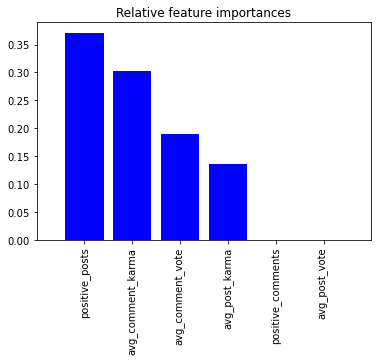

In [107]:
#Define Decision tree classifier with some default parameters
clf_bal = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3, min_samples_leaf=3).fit(X_sm, y_sm)

pred_DT_bal = clf_bal.predict(X_test)
pred_DT_probs_bal = clf.predict_proba(X_test)
print ("F1 score is: ", (f1_score(y_test,pred_DT_bal)))
# clf.score(X_test, y_test)
print ("Accuracy is: ", (accuracy_score(y_test,pred_DT_bal)*100).round(2))

feature_importance(clf_bal)

# Logistic Regression Balanced

F1 score is:  0.5283757338551859
Accuracy is:  50.31


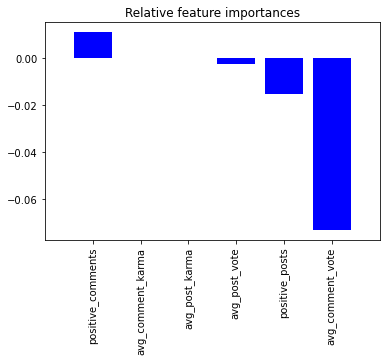

In [108]:
lr_bal = LogisticRegression(solver='lbfgs').fit(X_sm, y_sm)

y_pred_lr_bal = lr_bal.predict(X_test)
y_predProba_lr_bal = lr_bal.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,y_pred_lr_bal)))
print ("Accuracy is: ", (accuracy_score(y_test, y_pred_lr_bal)*100).round(2))

importances = lr_bal.coef_[0]
indices = np.argsort(importances)[::-1]
feature_order = np.array([train.columns.values])
i = np.argsort(importances)[::-1]
feature_order = feature_order[:,i]
plt.figure()
plt.title("Relative feature importances")
plt.bar(range(train.shape[1]), importances[indices],color="b",  align="center")
plt.xticks(range(train.shape[1]), feature_order[0], rotation=90)
plt.xlim([-1, train.shape[1]])
plt.show()

# XGBBoost Balanced

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:08] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


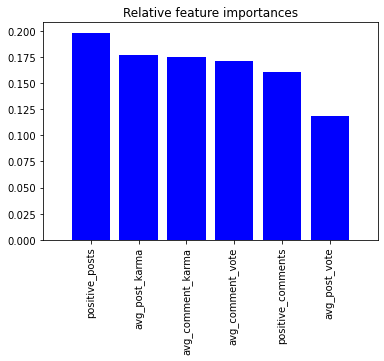

F1 score is:  0.4510638297872341
Accuracy is:  46.8


In [109]:
model_bal = XGBClassifier().fit(X_sm, y_sm)

pred_XGB_bal = model_bal.predict(X_test)
pred_XGB_prob_bal = model_bal.predict_proba(X_test)
feature_importance(model_bal)

print ("F1 score is: ", (f1_score(y_test,pred_XGB_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_XGB_bal)*100).round(2))
# model.score(X_test, y_test)

# Naive bayes balanced

In [110]:
model_nb_bal = GaussianNB().fit(X_sm, y_sm)

pred_nb_bal = model_nb_bal.predict(X_test)
pred_NB_prob_bal = model_nb.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,pred_nb_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_nb_bal)*100).round(2))
# model_nb.score(X_test, y_test)

F1 score is:  0.6481481481481481
Accuracy is:  52.99


# SVC balanced

In [111]:
# model_svc_bal = SVC(kernel = "poly", probability=True).fit(X_sm, y_sm)

# pred_svc_bal = model_svc_bal.predict(X_test)
# pred_svc_prob_bal = model_svc_bal.predict_proba(X_test)

# print ("F1 score is: ", (f1_score(y_test,pred_svc_bal)))
# print ("Accuracy is: ", (accuracy_score(y_test,pred_svc_bal)*100).round(2))
# model_svc.score(X_test, y_test)

# Random Forest Balance

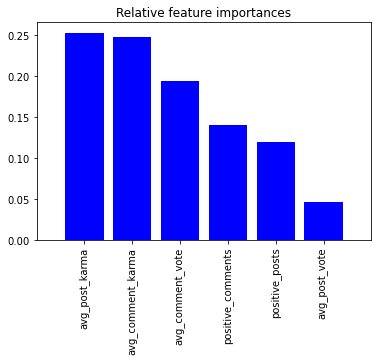

F1 score is:  0.493723849372385
Accuracy is:  50.1


In [112]:
model_rf_bal = RandomForestClassifier(n_estimators=50, random_state=1, n_jobs=-1).fit(X_sm, y_sm)

pred_rf_bal = model_rf_bal.predict(X_test)
pred_RF_prob_bal = model_rf_bal.predict_proba(X_test)
feature_importance(model_rf_bal)

print ("F1 score is: ", (f1_score(y_test,pred_rf_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,pred_rf_bal)*100).round(2))
# model_rf.score(X_test, y_test)

# Ensemble Balanced

In [113]:
model_voting_bal = VotingClassifier(
    estimators=[
        ('rf', model_rf_bal),
#         ('svc', model_svc_bal),
        ('gnb', model_nb_bal),
        ('xgb', model_bal),
    ],voting='soft')

pipe_bal = make_pipeline(
    SimpleImputer(),
    model_voting
)


pipe_bal.fit(X_sm, y_sm)
y_pred_bal = pipe_bal.predict(X_test)
y_pred_prob_bal = pipe_bal.predict_proba(X_test)

print ("F1 score is: ", (f1_score(y_test,y_pred_bal)))
print ("Accuracy is: ", (accuracy_score(y_test,y_pred_bal)*100).round(2))
# pipe.score(X_test, y_test)

/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:39:17] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
F1 score is:  0.5
Accuracy is:  48.87


/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/mohsinkhan/opt/anaconda3/envs/masterthesis/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [114]:
plt.figure(figsize=(12,10))

for test, pred, name in zip([y_test, y_test, y_test, y_test, y_test, y_test], [y_predProba_lr_bal[:,1], pred_XGB_prob_bal[:,1], pred_NB_prob_bal[:,1], pred_RF_prob_bal[:,1], y_pred_prob_bal[:,1], pred_XGB_prob_bal[:,1]], ['Logistic Regression Balanced','XGBClassifier Balanced', 'Naive Bayes Balanced', 'Random Forest Balanced','Model Ensemble Balanced', 'Decision Tree Balanced']):
    fpr, tpr, _ = roc_curve(test, pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='{}: AUC = {}'.format(name, round(roc_auc, 3)))
    plt.legend(loc='best')
    plt.plot([0,1],[0,1],color='black', linestyle='--')

plt.title('ROC curve (Receiver Operating Characteristic)')    
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')

plt.show()